### Load Modules

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Prepare/collect data

In [105]:
import os

path = os.listdir('Brain_tumour/')
classes = {'no_tumor':0, 'yes_tumor':1}

In [106]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'Brain_tumour/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [107]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [108]:
np.unique(Y)

array([0, 1])

In [109]:
pd.Series(Y).value_counts()

1    155
0     98
Name: count, dtype: int64

In [110]:
X.shape, X_updated.shape

((253, 200, 200), (253, 40000))

### Visualize data

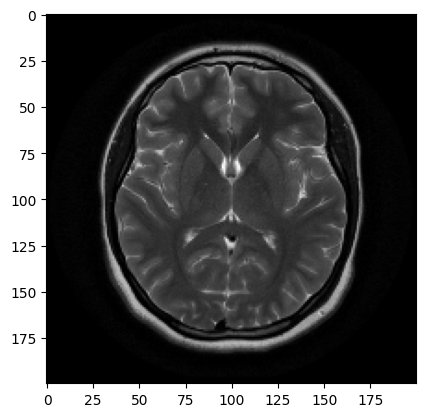

In [111]:
plt.imshow(X[0], cmap='gray')

### Prepare data

In [112]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(253, 40000)

### Split Data

In [113]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [114]:
xtrain.shape, xtest.shape

((202, 40000), (51, 40000))

### Feature Scaling

In [115]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Feature Selection: PCA

In [116]:
from sklearn.decomposition import PCA

In [117]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(202, 40000) (51, 40000)


In [118]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

### Train Model

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [120]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


LogisticRegression(C=0.1)

In [121]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

### Evaluation

In [122]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.6666666666666666


In [123]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9207920792079208
Testing Score: 0.6470588235294118


### Prediction

In [124]:
pred = sv.predict(xtest)


In [125]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 2,  9, 10, 14, 15, 16, 17, 20, 22, 31, 33, 34, 36, 41, 42, 43, 48,
        49], dtype=int64),)

In [126]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  18
1 0


In [127]:
from sklearn.metrics import accuracy_score
accuracy_score_value = accuracy_score(ytest, pred.round())
print("Accuracy:", accuracy_score_value)

Accuracy: 0.6470588235294118


In [128]:
from sklearn.metrics import precision_score
precision_score_value = precision_score(ytest, pred.round())
print("Precision:", precision_score_value)

Precision: 0.7105263157894737


In [129]:
from sklearn.metrics import f1_score
f1_score_value = f1_score(ytest, pred.round())
print("F1 Score:", f1_score_value)

F1 Score: 0.7499999999999999


In [130]:
from sklearn.metrics import recall_score
recall_score_value = recall_score(ytest, pred.round())
print("Recall:", recall_score_value)

Recall: 0.7941176470588235
